<a href="https://colab.research.google.com/github/anwishn/ESAA/blob/main/0926_%EA%B3%BC%EC%A0%9C_tips_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [2]:
tips = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv", sep=",")
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the Unnamed 0 column

In [ ]:
tips=tips.drop('Unnamed: 0', axis=1)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column histogram

Text(0, 0.5, 'Total Bill')

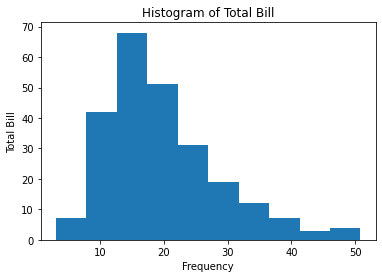

In [ ]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

axes1.hist(tips['total_bill'])

axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

Text(0, 0.5, 'TIp')

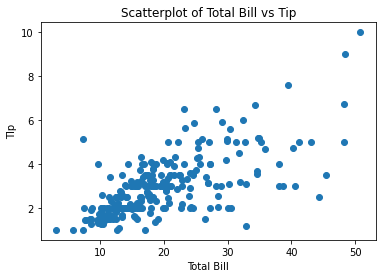

In [ ]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)

axes1.scatter(tips["total_bill"], tips["tip"])

axes1.set_title("Scatterplot of Total Bill vs Tip")
axes1.set_xlabel("Total Bill")
axes1.set_ylabel("TIp")

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

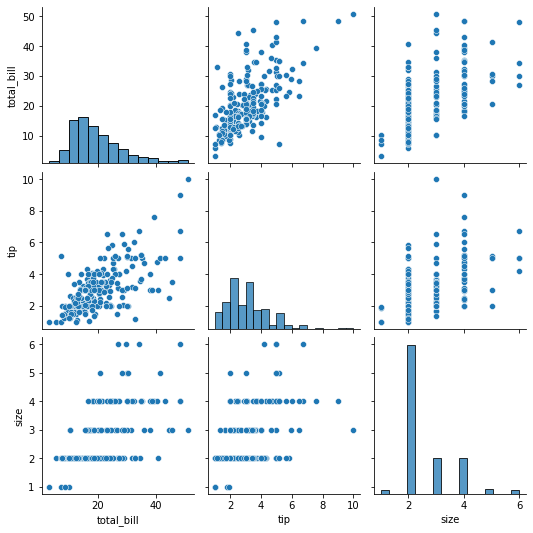

In [3]:
fig = sns.pairplot(data=tips, vars=["total_bill", 'tip', 'size'])

### Step 8. Present the relationship between days and total_bill value

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Tip')

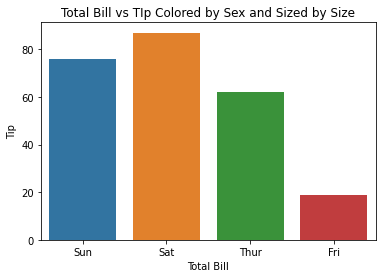

In [5]:
axes1 = plt.subplots()
axes1 = sns.countplot('day', data=tips)

axes1.set_title('Total Bill vs TIp Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

Text(0, 0.5, 'Day')

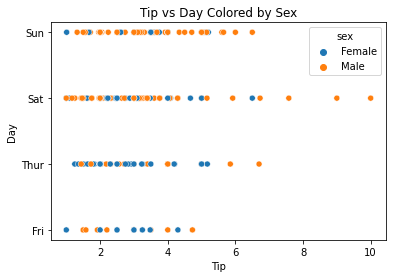

In [6]:
# hue인자를 이용하여 sex에 따라 다르게 그리기
axes1 = plt.subplots()

axes1 = sns.scatterplot(x='tip', y='day', data=tips, hue='sex')

axes1.set_title('Tip vs Day Colored by Sex')
axes1.set_xlabel('Tip')
axes1.set_ylabel('Day')

Text(0, 0.5, 'Day')

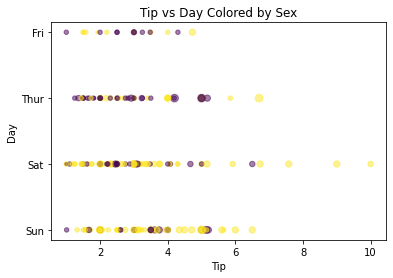

In [ ]:
# 성별에 따라 0, 1로 변환하여 c인자에 넣어 그리기
def recode_sex(sex):
  if sex == 'Female':
    return 0
  else:
    return 1

tips['sex_color'] = tips['sex'].apply(recode_sex)

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)

axes1.scatter(
    x=tips['tip'],
    y=tips['day'],
    s=tips['size']*10,           # 점의 크기 조절
    c=tips['sex_color'],         # 점의 색상 조절
    alpha=0.5) 

axes1.set_title('Tip vs Day Colored by Sex')
axes1.set_xlabel('Tip')
axes1.set_ylabel('Day')

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

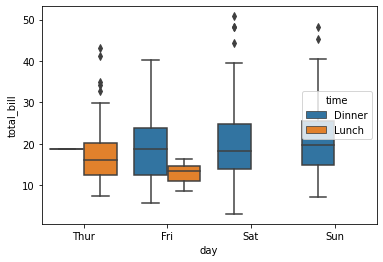

In [8]:
ax = plt.subplots()
ax = sns.boxplot(x='day', y='total_bill', hue='time', data=tips, order=['Thur','Fri','Sat',"Sun"])

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


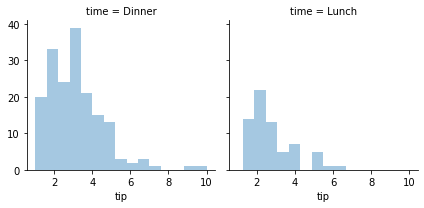

In [ ]:
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'tip', kde=False)

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

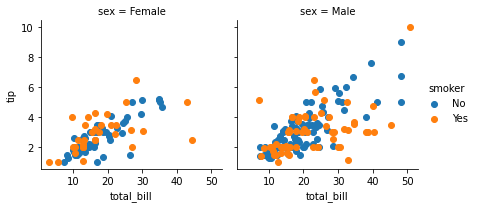

In [ ]:
facet = sns.FacetGrid(tips, col='sex', hue='smoker')
facet.map(plt.scatter, 'total_bill','tip')
facet = facet.add_legend()

### BONUS: Create your own question and answer it using a graph.

Q. Implot 메서드를 이용하여 day를 기준으로 4개 데이터 그룹에 대한 그래프를 한번에 그리시오.

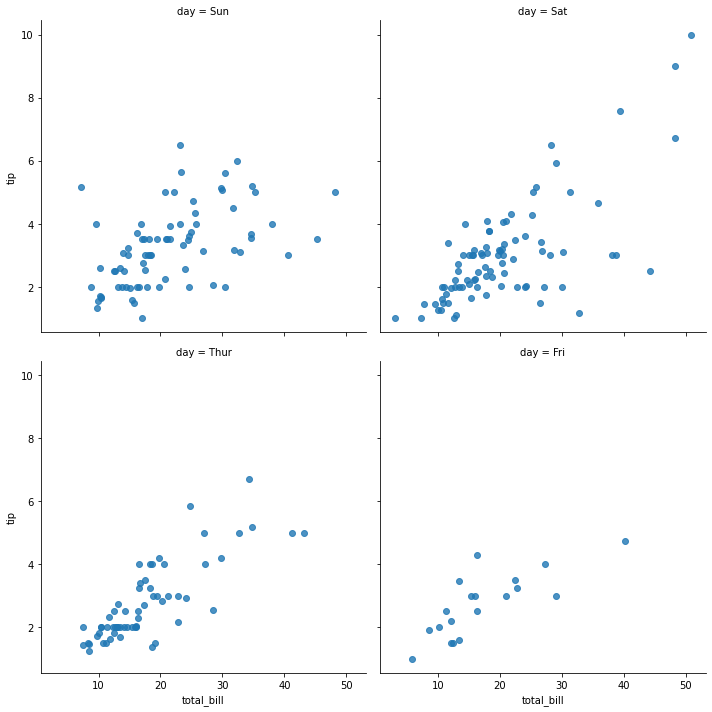

In [ ]:
tips_plot = sns.lmplot(x='total_bill',y='tip',data=tips, fit_reg=False, col='day',col_wrap=2)